In [1]:
import gensim
import numpy as np
import os
import sys

ROOT = os.path.dirname(os.getcwd())
path_data = 'C:\\Users\\Gosia\\Desktop\\'
sys.path.insert(0, ROOT)

sys.path.append('C:\\Users\\Gosia\\Desktop\\FDR-Metabolomics\\src\\')

In [2]:
import passatutto_parser as pp
from matchms.importing.load_from_json import as_spectrum


pre_spectrums_query = pp.PassatuttoParser(r'C:\\Users\\Gosia\\Desktop\\MassbankOrbi').parse_folder()
pre_spectrums_lib = pp.PassatuttoParser('C:\\Users\\Gosia\\Desktop\\Gnps').parse_folder()

# Using MatchMS to create spectra for both
spectrums_query = []
for i, s in enumerate( pre_spectrums_query ):
    spectrums_query.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d' % i)
        
spectrums_lib = []
for i, s in enumerate( pre_spectrums_lib ):
    spectrums_lib.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d' % i)
        

processed 100 files
processed 200 files
processed 300 files
processed 400 files
Finished parsing of 458 spectra 
processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 files
processed 800 files
processed 900 files
processed 1000 files
processed 1100 files
processed 1200 files
processed 1300 files
processed 1400 files
processed 1500 files
processed 1600 files
processed 1700 files
processed 1800 files
processed 1900 files
processed 2000 files
processed 2100 files
processed 2200 files
processed 2300 files
processed 2400 files
processed 2500 files
processed 2600 files
processed 2700 files
processed 2800 files
processed 2900 files
processed 3000 files
processed 3100 files
processed 3200 files
processed 3300 files
processed 3400 files
processed 3500 files
processed 3600 files
processed 3700 files
processed 3800 files
processed 3900 files
processed 4000 files
processed 4100 files
Finished parsing of 4138 spectra 
p

In [3]:
# Loading the decoy database
pre_spectrums_decoys_cond = pp.DecoyParserPassattuto(r'C:\\Users\\Gosia\\Desktop\\GnpsDecoyConditionalPeaks').parse_folder()
pre_spectrums_decoys_rand = pp.DecoyParserPassattuto(r'C:\\Users\\Gosia\\Desktop\\GnpsDecoyRandomPeaks').parse_folder()

# Using MatchMS to create decoy spectra
decoys_cond = []
for i, s in enumerate( pre_spectrums_decoys_cond ):
    decoys_cond.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d'% i)

decoys_rand = []
for i, s in enumerate( pre_spectrums_decoys_rand ):
    decoys_rand.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d'% i)

processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 files
processed 800 files
processed 900 files
processed 1000 files
processed 1100 files
processed 1200 files
processed 1300 files
processed 1400 files
processed 1500 files
processed 1600 files
processed 1700 files
processed 1800 files
processed 1900 files
processed 2000 files
processed 2100 files
processed 2200 files
processed 2300 files
processed 2400 files
processed 2500 files
processed 2600 files
processed 2700 files
processed 2800 files
processed 2900 files
processed 3000 files
processed 3100 files
processed 3200 files
processed 3300 files
processed 3400 files
processed 3500 files
processed 3600 files
processed 3700 files
processed 3800 files
processed 3900 files
processed 4000 files
processed 4100 files
Finished parsing of 4138 spectra 
processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 

In [4]:
from matchms.filtering import normalize_intensities
# Spec2Vec trained model requires normalizing
spectrums_query = [normalize_intensities(s) for s in spectrums_query]
spectrums_lib = [normalize_intensities(s) for s in spectrums_lib]

decoys_cond = [normalize_intensities(s) for s in decoys_cond]
decoys_rand = [normalize_intensities(s) for s in decoys_rand]


Load pretrained spec2vec model

In [5]:
path_models = os.path.join(path_data, "trained_models_1")
model_file = os.path.join(path_models, "spec2vec_size_170.model")

model = gensim.models.Word2Vec.load(model_file)
print(model_file)

C:\Users\Gosia\Desktop\trained_models_1\spec2vec_size_170.model


Create spectrum "documents"

In [6]:
from spec2vec import Spec2Vec
from spec2vec import SpectrumDocument

documents_query = [SpectrumDocument(s, n_decimals=2) for s in spectrums_query]
documents_lib = [SpectrumDocument(s, n_decimals=2) for s in spectrums_lib]

documents_decoys_cond = [SpectrumDocument(s, n_decimals=2) for s in decoys_cond]
documents_decoys_rand = [SpectrumDocument(s, n_decimals=2) for s in decoys_rand]


Derive embeddings

In [7]:
from tqdm.notebook import tqdm  # optional, just to get a progress bar
from spec2vec.vector_operations import calc_vector


intensity_weighting_power = 0.5
allowed_missing_percentage = 70 # specify the maximum (weighted) fraction of the spectrum that is allowed to be missing

vector_size = model.vector_size
print(f"Embedding vector size: {vector_size}")

embeddings_spec2vec_query = np.zeros((len(documents_query), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_query)):
    embeddings_spec2vec_query[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)
embeddings_spec2vec_lib = np.zeros((len(documents_lib), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_lib)):
    embeddings_spec2vec_lib[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)

Embedding vector size: 170


Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.32%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.24%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.03%.



Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.16%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.54%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.26%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 1 word(s) missing in the model.

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.56%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.21%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 1 word(s) missing in the model.

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.21%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.25%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.54%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.84%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 4 word(s) missing in the model.

Found 75 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.79%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.60%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.11%.
Found 92 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.46%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.86%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.51%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.79%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.04%.
Found 82 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.42%.
Found 60 word(s) missing in 

Found 479 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.26%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.86%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.70%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.72%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.30%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.98%.
Found 163 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.32%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.71%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.85%.
Found 6 word(s) missing i

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.22%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.92%.
Found 683 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.31%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.24%.
Found 70 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.91%.
Found 650 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.85%.
Found 77 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.43%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.19%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.03%.
Found 113 word(s) missing

Found 438 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.08%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.14%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.71%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.11%.
Found 57 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.99%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.17%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.09%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.54%.
Found 91 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 149 word(s) miss

Found 376 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.36%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.40%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.18%.
Found 767 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.59%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.44%.
Found 828 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.96%.
Found 1098 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.75%.
Found 1316 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.05%.
Found 468 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.84%.
Found 34 word(

Found 185 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.16%.
Found 496 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.46%.
Found 71 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.59%.
Found 265 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.51%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.43%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.00%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.74%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.01%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.51%.
Found 12 word(s) missing in 

Found 345 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.89%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.03%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.41%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.29%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.42%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.00%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.94%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.86%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.28%.
Found 2 word(s) missing in th

Found 92 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.02%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 316 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.46%.
Found 129 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.62%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.58%.
Found 408 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.94%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.58%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.61%.
Found 455 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.14%.
Found 39 word(s) mis

Found 219 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.95%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.04%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.67%.
Found 457 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.60%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.99%.
Found 84 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.91%.
Found 102 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.45%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.35%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.48%.
Found 28 word(s) m

Found 307 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.58%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.94%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.68%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.25%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.35%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.49%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.17%.
Found 231 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.20%.
Found 15 word(s) missin

Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.08%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.85%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.09%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.13%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.09%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.95%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.49%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.57%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.01%.
Found 7 word(s) missing in th

Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.59%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.95%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.41%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.25%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.78%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.96%.
Found 315 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.54%.
Found 317 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.00%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.49%.
Found 54 word(s) missing 

Found 223 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.64%.
Found 173 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.81%.
Found 308 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.12%.
Found 494 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.78%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.36%.
Found 838 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.24%.
Found 154 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.23%.
Found 176 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.71%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.34%.
Found 589 wo

Found 72 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.85%.
Found 299 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.34%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.53%.
Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 260 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.05%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.46%.
Found 575 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.68%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.88%.
Found 82 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.23%.
Found 97 word(s) m

Found 388 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 482 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.76%.
Found 218 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.69%.
Found 211 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.33%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.14%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.00%.
Found 121 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.57%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.55%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 182 word(s

Found 2320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.56%.
Found 354 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.47%.
Found 247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.27%.
Found 208 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.68%.
Found 193 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.56%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.64%.
Found 279 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.04%.
Found 245 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.36%.
Found 205 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.12%.
Found 197 

Found 1463 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.49%.
Found 445 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.41%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.17%.
Found 188 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.91%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.16%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.10%.
Found 290 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.73%.
Found 374 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.51%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.87%.
Found 433 word(

Found 1820 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.72%.
Found 183 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.94%.
Found 1244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.12%.
Found 302 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.48%.
Found 213 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.86%.
Found 118 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.54%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.01%.
Found 156 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.18%.
Found 1014 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.81%.
Found 277

Found 302 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.76%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.03%.
Found 285 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.83%.
Found 863 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.13%.
Found 462 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.67%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.74%.
Found 77 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.47%.
Found 497 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.53%.
Found 222 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.36%.
Found 180 word(

Found 369 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.45%.
Found 481 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.15%.
Found 404 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.44%.
Found 534 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.87%.
Found 559 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.30%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 684 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.41%.
Found 346 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.53%.
Found 157 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.37%.
Found 277 wor

Found 485 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.37%.
Found 246 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.03%.
Found 308 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.52%.
Found 280 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.68%.
Found 501 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.66%.
Found 495 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.21%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.61%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.29%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.71%.
Found 99 word(s

Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.52%.
Found 55 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.44%.
Found 405 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.60%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.57%.
Found 186 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.34%.
Found 190 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.38%.
Found 70 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 144 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.06%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.33%.
Found 1224 word(

Found 1540 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.71%.
Found 281 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.01%.
Found 287 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.88%.
Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.88%.
Found 545 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.54%.
Found 836 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.78%.
Found 315 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.26%.
Found 467 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.81%.
Found 812 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.33%.
Found 601

Found 837 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.69%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.55%.
Found 95 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.81%.
Found 127 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.97%.
Found 394 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.48%.
Found 188 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.77%.
Found 145 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.75%.
Found 371 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.10%.
Found 200 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.04%.
Found 33 word(

Found 1092 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.65%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.80%.
Found 265 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.26%.
Found 779 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.91%.
Found 93 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.12%.
Found 298 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.06%.
Found 157 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.87%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.23%.
Found 342 word(s) 

Found 176 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.07%.
Found 198 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.26%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.77%.
Found 275 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.00%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.50%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.57%.
Found 1594 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.25%.
Found 339 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.14%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.61%.
Found 94 word(s

Found 744 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.12%.
Found 182 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.52%.
Found 90 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.94%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.99%.
Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.62%.
Found 129 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.88%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.05%.
Found 91 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.73%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.99%.
Found 448 word(s) 

Found 250 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.51%.
Found 151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.92%.
Found 454 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.82%.
Found 537 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.48%.
Found 450 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.83%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.33%.
Found 151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.40%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.80%.
Found 175 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.22%.
Found 661 wo

Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.46%.
Found 513 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.05%.
Found 132 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.31%.
Found 84 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.16%.
Found 461 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.05%.
Found 485 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.37%.
Found 605 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.37%.
Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.88%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.75%.
Found 176 word(s) m

Found 931 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.13%.
Found 91 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.29%.
Found 78 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.20%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.04%.
Found 51 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.16%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.77%.
Found 393 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.27%.
Found 332 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.37%.
Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.48%.
Found 241 word(s

Found 873 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.76%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.86%.
Found 484 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.15%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.61%.
Found 325 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.47%.
Found 261 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.42%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.56%.
Found 487 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.83%.
Found 1592 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.38%.
Found 65 word(

Found 928 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.16%.
Found 184 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.04%.
Found 2151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.94%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.30%.
Found 1045 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.83%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.28%.
Found 952 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.83%.
Found 115 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.21%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.31%.
Found 38 wor

Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.71%.
Found 555 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.73%.
Found 477 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.70%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.65%.
Found 195 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.18%.
Found 241 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.81%.
Found 76 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.05%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.43%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.76%.
Found 133 word(s) m

Found 725 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.69%.
Found 997 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.19%.
Found 1349 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.77%.
Found 355 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.88%.
Found 276 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.03%.
Found 1256 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.81%.
Found 150 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.37%.
Found 1140 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.46%.
Found 311 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.26%.
Found 23

Found 299 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.66%.
Found 272 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.65%.
Found 117 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.96%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.37%.
Found 120 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.68%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.01%.
Found 170 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.95%.
Found 494 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.28%.
Found 1487 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.92%.
Found 452 wo

Found 2166 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.87%.
Found 418 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.63%.
Found 765 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.12%.
Found 1113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.96%.
Found 3251 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.68%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.49%.
Found 174 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.80%.
Found 3167 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.78%.
Found 530 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.64%.
Found 84

Found 579 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.97%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.88%.
Found 917 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.19%.
Found 869 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.69%.
Found 451 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.04%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.70%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.85%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.13%.
Found 152 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.70%.
Found 952 word(s)

Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.46%.
Found 215 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.18%.
Found 847 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.54%.
Found 167 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.23%.
Found 2927 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.67%.
Found 3654 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.16%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.51%.
Found 261 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.74%.
Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.09%.
Found 58 wor

Found 1012 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.22%.
Found 537 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.35%.
Found 1720 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.29%.
Found 294 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.54%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.98%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.75%.
Found 402 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.38%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.05%.
Found 114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 690 word(s

Found 1714 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.04%.
Found 906 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.47%.
Found 320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.02%.
Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.92%.
Found 1588 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.73%.
Found 2244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.47%.
Found 4155 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.65%.
Found 3261 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.53%.
Found 172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.22%.
Found

Found 2065 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.73%.
Found 1645 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.11%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.11%.
Found 428 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.05%.
Found 1855 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.30%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.36%.
Found 1038 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.14%.
Found 359 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.11%.
Found 262 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.64%.
Found 18

Found 2008 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.60%.
Found 100 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.51%.
Found 458 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.10%.
Found 573 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.71%.
Found 126 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.33%.
Found 231 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.58%.
Found 1465 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.30%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.32%.
Found 1805 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.43%.
Found 113 

Found 1242 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.24%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.13%.
Found 1012 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.73%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.71%.
Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 207 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.53%.
Found 978 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.31%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.37%.
Found 762 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.96%.
Found 415 word(s

Found 927 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.66%.
Found 729 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.63%.
Found 130 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.84%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.73%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.10%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.67%.
Found 422 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.72%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.70%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.21%.
Found 331 word(s) m

In [8]:


embeddings_spec2vec_decoys_cond = np.zeros((len(documents_decoys_cond), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_decoys_cond)):
    embeddings_spec2vec_decoys_cond[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)
embeddings_spec2vec_decoys_rand = np.zeros((len(documents_decoys_rand), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_decoys_rand)):
    embeddings_spec2vec_decoys_rand[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.01%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.05%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 1 word(s) missing in the model.

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.02%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.02%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.04%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.03%.
Found 1 word(s) missing in the model.

In [9]:
import importlib
import cosine_calc
importlib.reload(cosine_calc)

<module 'cosine_calc' from 'C:\\Users\\Gosia\\Desktop\\FDR-Metabolomics\\src\\cosine_calc.py'>

In [10]:
from cosine_calc import get_spec2vec_hits

hits = get_spec2vec_hits( documents_query, documents_lib, model, precursor_tol=3,
                            intensity_weighting_power=intensity_weighting_power,
                            allowed_missing_percentage=allowed_missing_percentage, passatutto=True,
                embeddings_query=embeddings_spec2vec_query, embeddings_library=embeddings_spec2vec_lib)

In [11]:
def add_pmz(specs):
    from rdkit.Chem import MolFromSmiles, MolToSmiles, MolFromInchi
    from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcMolFormula
    for s in specs:
        s._obj.set('precursor_mz', s._obj.get('parent_mass', 0))
        
add_pmz(documents_query)

In [12]:
import copy
documents_decoys_cond = []
for v,d in zip(embeddings_spec2vec_decoys_cond,documents_lib):
    decoy_doc = copy.deepcopy(d)
    decoy_doc._obj.set('inchi', 'knockoff')
    decoy_doc._obj.set('inchikey_inchi', 'knockoff')
    decoy_doc._obj.set('vector', v)
    documents_decoys_cond.append(decoy_doc)

hits_decoys_cond = get_spec2vec_hits(documents_query, documents_decoys_cond, decoys=True, model=model, precursor_tol=3, metaKey="precursor_mz",
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage, passatutto=True,
                                    embeddings_query=embeddings_spec2vec_query )


documents_decoys_rand = []
for v,d in zip(embeddings_spec2vec_decoys_rand,documents_lib):
    decoy_doc = copy.deepcopy(d)
    decoy_doc._obj.set('inchi', 'knockoff')
    decoy_doc._obj.set('inchikey_inchi', 'knockoff')
    decoy_doc._obj.set('vector', v)
    documents_decoys_rand.append(decoy_doc)

hits_decoys_rand = get_spec2vec_hits(documents_query, documents_decoys_rand, decoys=True, model=model, precursor_tol=3, metaKey="precursor_mz",
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage, passatutto=True,
                                    embeddings_query=embeddings_spec2vec_query )

In [13]:
# Calculating true q-value scores
from q_value_calc import calculate_q_value
q_list_true = calculate_q_value(hits)

In [14]:
# Calculating estimated q-value scores
q_list_estimated_cond = calculate_q_value(hits+hits_decoys_cond,True)
q_list_estimated_rand = calculate_q_value(hits+hits_decoys_rand,True)

In [15]:
from knockoffs import generate_knockoffs

# Good candidate: (110,3)
diags = [110]
q_list_knockoffs = {}
for diag in diags:
    for comp in [3,5]:
        try:
            knockoff_documents = generate_knockoffs(model,documents_lib,allowed_missing_percentage=allowed_missing_percentage,n_components=comp, diagonal_matrix=diag, embeddings=embeddings_spec2vec_lib)
            hits_knockoffs = get_spec2vec_hits(documents_query, knockoff_documents, decoys=True, model=model, precursor_tol=3, metaKey="precursor_mz",
                                                                    intensity_weighting_power=intensity_weighting_power,
                                                                    allowed_missing_percentage=allowed_missing_percentage, passatutto=True, embeddings_query=embeddings_spec2vec_query)
            q_list_knockoffs[(diag, comp)] = calculate_q_value(hits+hits_knockoffs,True)
        except Exception as e:
            print( diag, "failed", e )

Embedding vector size: 170
Embedding vector size: 170


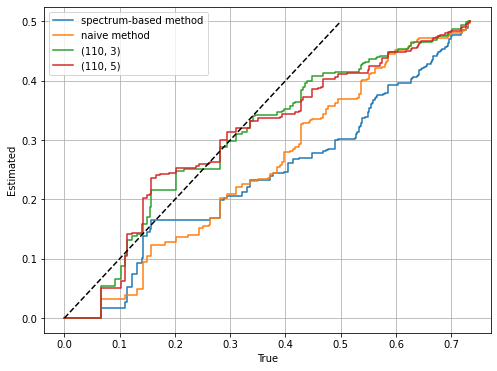

In [16]:
# plot estimated and true q-values
def combine_true_est(q_val_true,q_val_est):
    res = []
    q_idx = 0
    for q_e, _, score in q_val_est:
        while q_idx < len(q_val_true)-1 and q_val_true[q_idx+1][2] >= score:
            q_idx += 1
        res.append((score, q_val_true[q_idx][0], q_e))
    return res
        
scores_cond, trues_cond, estimateds_cond = zip(*combine_true_est(q_list_true, q_list_estimated_cond))
scores_rand, trues_rand, estimateds_rand = zip(*combine_true_est(q_list_true, q_list_estimated_rand))
to_plot = {'spectrum-based method':(trues_cond,estimateds_cond), 'naive method':(trues_rand,estimateds_rand)}
for k,v in q_list_knockoffs.items():
    to_plot[k] = list(zip(*combine_true_est(q_list_true, v)))[1], list(zip(*combine_true_est(q_list_true, v)))[2]

import plot_q_vals
plot_q_vals.plot_q_vals( to_plot )